# OIH Source Timeline

The timeline represents the date a partner/provider started being indexed and in the OIH
Graph.

See abouting CSV support via [mitosheet](https://medium.com/geekculture/goodbye-excel-hello-spreadsheets-in-python-df41408dafd4)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

In [6]:
df = pd.read_csv('./data/oihSources.csv')
df

,name,propername,dates
0,obps,Ocean Best Practices,2021-01-26
1,obis,Ocean Biodiversity Information System,2021-02-26
2,aquadocs,AquaDocs,2021-02-26
3,marinetraining,Marine Training EU,2021-05-26
4,edmerp,EDMERP SeaDataNet,2021-07-26
5,edmo,EDMO SeaDataNet,2021-07-26
6,oceanexperts,OceanExpert IODE,2021-08-26
7,invemar,INVEMAR,2022-01-26
8,eurocean,EurOcean,2022-03-26
9,cioos,CIOOS Atlantic,2022-06-20


In [7]:
names = df['propername'].tolist()
dates = df['dates'].tolist()

In [8]:
# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

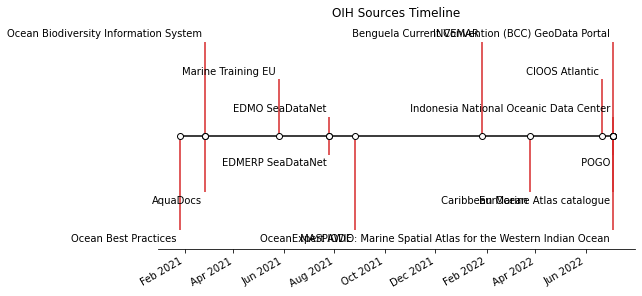

In [9]:
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="OIH Sources Timeline")

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()